<a href="https://colab.research.google.com/github/benjaminutter/IDS/blob/Project6/Project6R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
library(tidyverse)

url1 <- "https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Test.csv"
url2 <- "https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Training.csv"

data1 <- read.csv(url1)
data2 <- read.csv(url2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Creating a CART model and showing the decision tree

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Call:
rpart(formula = Approval ~ Debt.to.Income.Ratio + FICO.Score + 
    Request.Amount + Interest, data = data2, method = "class")
  n= 150302 

         CP nsplit rel error    xerror        xstd
1 0.5646498      0 1.0000000 1.0070605 0.002582269
2 0.1267551      1 0.4353502 0.4353502 0.002130393
3 0.0100000      2 0.3085951 0.3090347 0.001865861

Variable importance
          FICO.Score Debt.to.Income.Ratio 
                  74                   25 

Node number 1: 150302 observations,    complexity param=0.5646498
  predicted class=TRUE   expected loss=0.4994345  P(node) =1
    class counts: 75066 75236
   probabilities: 0.499 0.501 
  left son=2 (46002 obs) right son=3 (104300 obs)
  Primary splits:
      FICO.Score           < 659.5 to the left,  improve=28208.770, (0 missing)
      Debt.to.Income.Ratio < 0.305 to the right, improve= 8986.886, (0 missing)
      Request.Amount       < 25500 to the right, improve= 1191.854, (0 missing)
      Interest             < 11475 to the rig

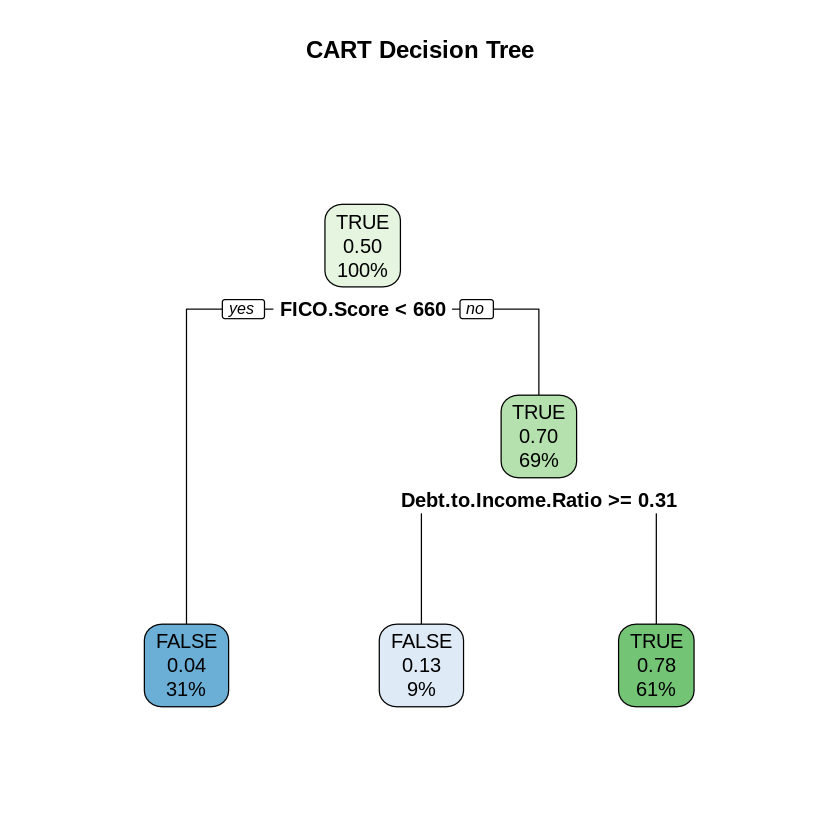

In [15]:
# rpart.plot package
install.packages("rpart.plot")

# load packages
library(rpart)
library(rpart.plot)

# create the CART model
cart_model <- rpart(Approval ~ Debt.to.Income.Ratio+FICO.Score+Request.Amount+Interest, data = data2, method = "class")

# show  decision tree
rpart.plot(cart_model, main = "CART Decision Tree")

# show first few splits
summary(cart_model)


Creating and displaying a C5.0 model:

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm




Call:
C5.0.formula(formula = Approval ~ Debt.to.Income.Ratio + FICO.Score
 + Request.Amount + Interest, data = data2, control = C5.0Control(minCases
 = 1000))


C5.0 [Release 2.07 GPL Edition]  	Mon Dec 11 19:22:54 2023
-------------------------------

Class specified by attribute `outcome'

Read 150302 cases (5 attributes) from undefined.data

Decision tree:

Debt.to.Income.Ratio > 0.31: FALSE (19884/1160)
Debt.to.Income.Ratio <= 0.31:
:...FICO.Score <= 655: FALSE (35346/894)
    FICO.Score > 655:
    :...FICO.Score <= 669:
        :...Request.Amount > 23000: FALSE (1547/529)
        :   Request.Amount <= 23000:
        :   :...FICO.Score <= 661: FALSE (3246/1418)
        :       FICO.Score > 661: TRUE (5892/2056)
        FICO.Score > 669:
        :...Debt.to.Income.Ratio <= 0.25: TRUE (75846/13356)
            Debt.to.Income.Ratio > 0.25:
            :...Request.Amount <= 25000: TRUE (7112/2658)
                Request.Amount > 25000: FALSE (1429/455)


Evaluation on training data (

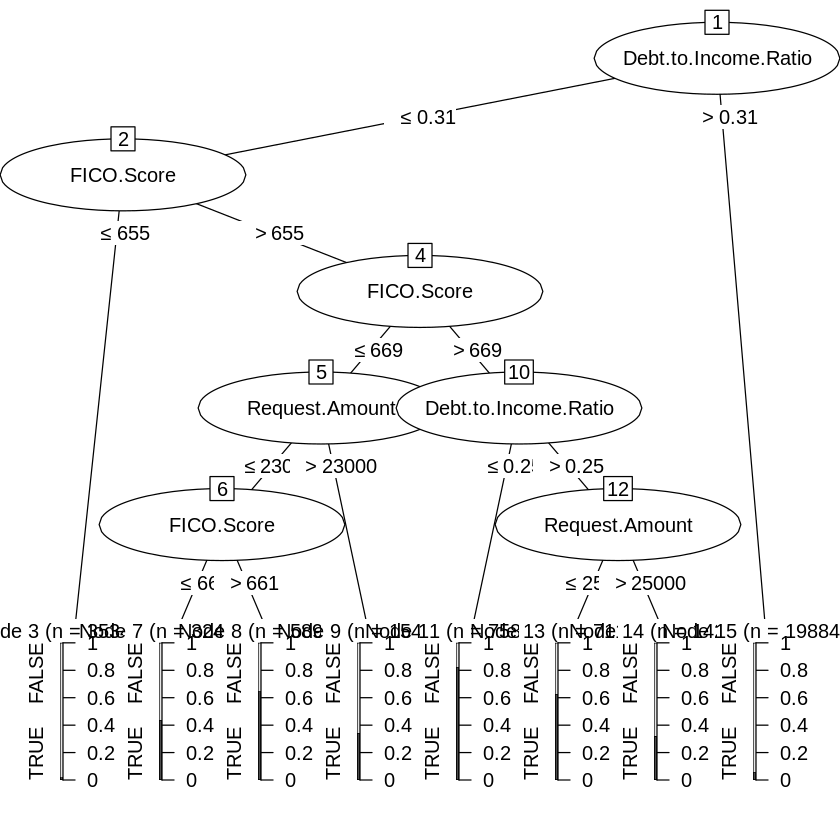

In [18]:
install.packages(c("C50", "partykit"))
library(C50)
library(partykit)

# convert 'Approval' to a factor
data2$Approval <- as.factor(data2$Approval)

# create C5.0 model
c50_model <- C5.0(Approval ~ Debt.to.Income.Ratio + FICO.Score + Request.Amount + Interest, data = data2, control = C5.0Control(minCases = 1000))

# show decision tree
plot(as.party(c50_model))

# show first few splits
summary(c50_model)


Summary of my findngs:

Both models made errors on the training data about 15% of the time. However, the C5.0 model is like a more detailed map with 8 nodes, while the CART model is simpler with only 3 nodes.

In terms of what's important, both models agree that a person's FICO Score is a big deal, followed by their Debt to Income Ratio.

If you want an easy-to-understand model, you might prefer the CART model. But if you're okay with a more complex model that considers more details, then the C5.0 model could be a good choice.